In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# part A
def x(x_0, v_0, t, omega):
    return x_0 * np.cos(omega * t) + v_0 / omega * np.sin(omega * t)

def v(x_0, v_0, t, omega):
    return -omega * x_0 * np.sin(omega * t) + v_0 * np.cos(omega * t)

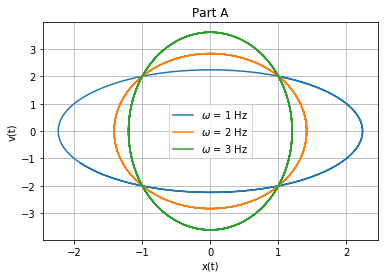

In [35]:
def plot(x_0, v_0, omega):
    t_arr = []
    x_arr = []
    v_arr = []
    dt = 0.01
    for i in range(1, 1000):
        t = i * dt
        t_arr.append(t)
        x_arr.append(x(x_0,v_0, t, omega))
        v_arr.append(v(x_0, v_0, t, omega))
    return x_arr, v_arr
    
fig, ax = plt.subplots()
x1, v1 = plot(1, 2, 1)
ax.plot(x1, v1, label="$\omega$ = 1 Hz")
x2, v2= plot(1, 2, 2)
ax.plot(x2, v2, label="$\omega$ = 2 Hz")
x3, v3 = plot(1, 2, 3)
ax.plot(x3, v3, label="$\omega$ = 3 Hz")
ax.set(xlabel='x(t)', ylabel='v(t)', title="Part A")
ax.grid()
plt.legend()
plt.show()

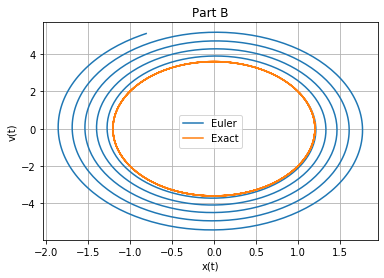

In [39]:
# part B
def plot_euler(k, ax):
    #variables
    t_arr = []
    x_arr = []
    v_arr = []
    dt = 0.01
    m = 1.0
    x_old = 1
    v_old = 2
    #numerically compute the position and velocity
    for i in range(1000):
        t = i * dt
        a = -k * x_old / m
        v = v_old + dt * a
        x = x_old + dt * v_old
        t_arr.append(t)
        x_arr.append(x)
        v_arr.append(v)
        x_old, v_old = x, v 
    return x_arr, v_arr
        
fig, ax = plt.subplots()
xe, ve = plot_euler(3 ** 2, ax)
ax.plot(xe, ve, label='Euler')
ax.plot(x3, v3, label='Exact')
ax.set(xlabel='x(t)', ylabel='v(t)', title="Part B")
ax.grid()
plt.legend()
plt.show()

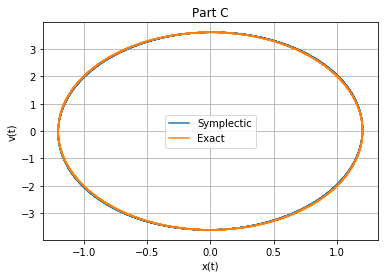

In [38]:
# part C
def plot_sym(k):
    #variables
    t_arr = []
    x_arr = []
    v_arr = []
    dt = 0.01
    m = 1.0
    x_old = 1
    v_old = 2
    a = -k * x_old / m
    x_old = x_old + (dt * 0.5) * v_old
    for i in range(1000):
        t = i * dt
        a = -k * x_old / m
        v = v_old + dt * a
        x = x_old + dt * v
        t_arr.append(t)
        x_arr.append(x)
        v_arr.append(v)
        x_old, v_old = x, v 
    return x_arr, v_arr


fig, ax = plt.subplots()
xs, vs = plot_sym(3 ** 2)
ax.plot(xs, vs, label='Symplectic')
ax.plot(x3, v3, label='Exact')
ax.set(xlabel='x(t)', ylabel='v(t)', title="Part C")
ax.grid()
plt.legend()
plt.show()

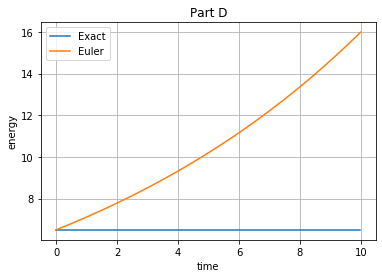

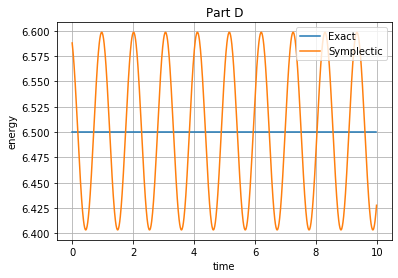

In [54]:
# part D
def plot_energy(x_arr, v_arr, ax, label):
    E = []
    t_arr = []
    
    for i in range(len(x_arr)):
        t_arr.append(i * 0.01)
        E.append(.5 * 3 ** 2 * x_arr[i] ** 2 + .5 * 1 * v_arr[i] **2)
    ax.plot(t_arr, E, label=label)


fig, ax = plt.subplots()
plot_energy(x3, v3, ax, "Exact")
plot_energy(xe, ve, ax, "Euler")
ax.set(xlabel='time', ylabel='energy', title="Part D")
ax.grid()
plt.legend()
plt.show()

fig, ax = plt.subplots()
plot_energy(x3, v3, ax, "Exact")
plot_energy(xs, vs, ax, "Symplectic")
ax.set(xlabel='time', ylabel='energy', title="Part D")
ax.grid()
plt.legend()
plt.show()